In [15]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'week', 100, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['week_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['month'] = data_prices[['open']].apply(
    lambda x: x.name.month, axis=1)
data_prices['year'] = data_prices[['open']].apply(
    lambda x: x.name.year, axis=1)

total = data_prices.iloc[:, 0].count()
last_date = data_prices.iloc[0].name.date()
first_date = data_prices.iloc[-1].name.date()

print(f"Thông tin: {total} hàng từ ngày {first_date} đến {last_date}")
print(data_prices)

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices, "ASC")


print(data_prices.pivot(index='month', columns='year', values=''))




Thông tin: 100 hàng từ ngày 2019-12-09 đến 2021-11-01
                             open    high   close     low  week_return  month  \
date                                                                            
2021-11-01 07:00:00+07:00  191.90  201.20  197.00  187.80     2.657634     11   
2021-10-25 07:00:00+07:00  190.40  205.00  191.90  171.10     0.787815     10   
2021-10-18 07:00:00+07:00  183.80  214.70  190.40  178.50     3.590860     10   
2021-10-11 07:00:00+07:00  174.80  193.00  183.70  166.30     5.091533     10   
2021-10-04 07:00:00+07:00  170.50  187.00  174.80  161.30     2.521994     10   
...                           ...     ...     ...     ...          ...    ...   
2020-01-06 07:00:00+07:00   43.29   51.95   51.43   43.16    18.803419      1   
2019-12-30 07:00:00+07:00   43.07   44.61   43.30   38.77     0.534014     12   
2019-12-23 07:00:00+07:00   41.84   43.76   43.08   39.38     2.963671     12   
2019-12-16 07:00:00+07:00   43.46   43.56   41.82   35.

type_continuous
0    48
2    26
3    14
4     7
5     3
6     2
dtype: int64


<Figure size 432x288 with 0 Axes>

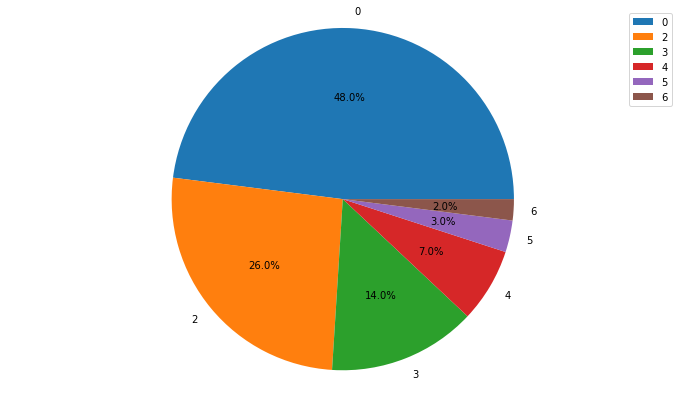

In [4]:
type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

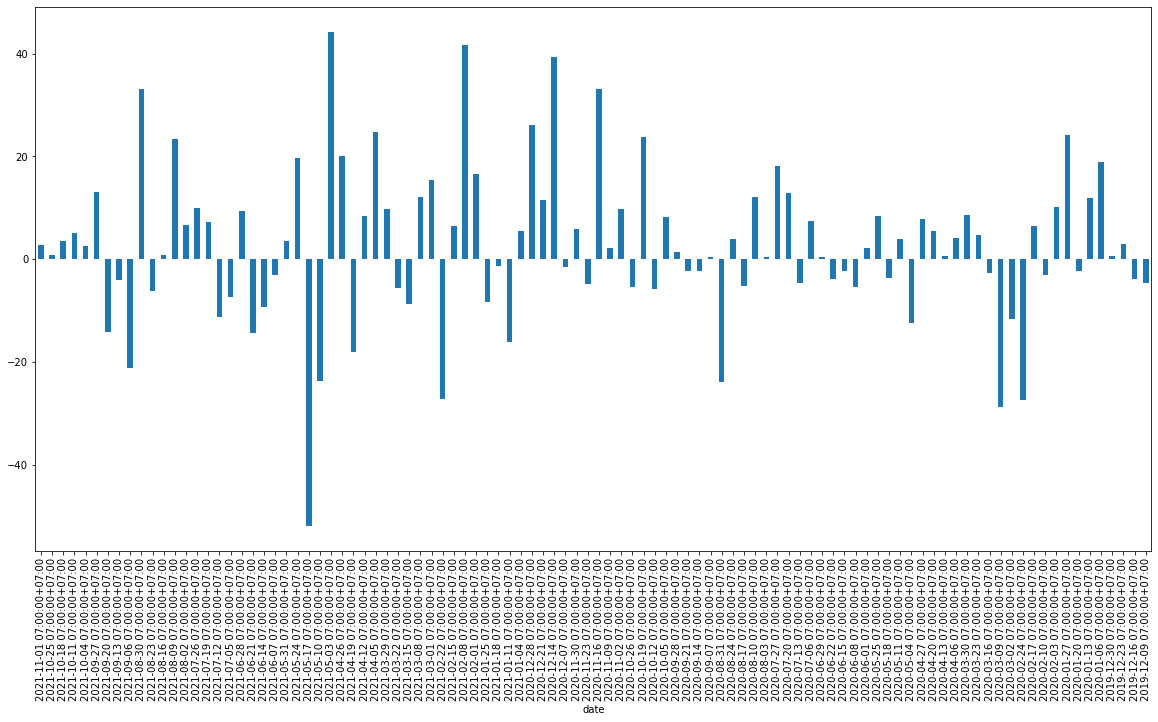

In [6]:
data_prices['week_return'].plot(figsize=[20,10], kind='bar')

<AxesSubplot:>

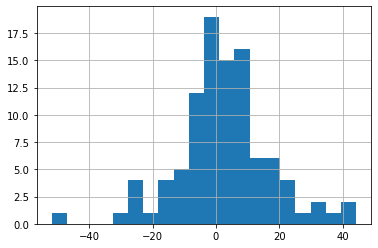

In [7]:
data_prices['week_return'].hist(bins=20)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

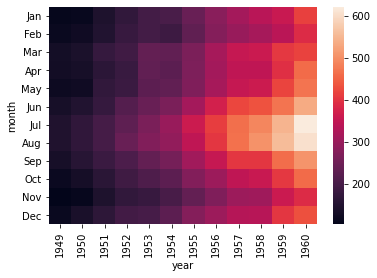

In [12]:
import seaborn as sns

# ax = sns.heatmap(flights, annot=True, fmt="d")

flights = sns.load_dataset("flights")


flights = flights.pivot("month", "year", "passengers")

print(flights)

ax = sns.heatmap(flights)